## Data analyste - Drug consumption

## Helper Functions

In [1]:
def despine_ax(ax):
    """
    Enlève les contours d'un axe dans une figure.
    """
    for spine in ax.spines.values():
        spine.set_visible(False)

In [69]:
def IsUser(usage):
    if usage == "Never Used": 
        return 0 
    elif usage == "Used over a Decade Ago": 
        return 1
    elif usage == "Used in Last Decade":
        return 2
    elif usage == "Used in Last Year":
        return 3
    elif usage == "Used in Last Month":
        return 4
    elif usage == "Used in Last Week":
        return 5
    elif usage == "Used in Last Day":
        return 6

In [3]:
def SetEducationToInt(usage):
    if usage == "Left school before 16": 
        return 0 
    elif usage == "Left school at 16": 
        return 1
    elif usage == "Left school at 17":
        return 2
    elif usage == "Left school at 18":
        return 3
    elif usage == "Some college or university, no certificate or degree":
        return 4
    elif usage == "Professional certificate/diploma":
        return 5
    elif usage == "University degree":
        return 6
    elif usage == "Masters degree":
        return 7
    elif usage == "Doctorate degree":
        return 8

In [4]:
def SetGenderToInt(usage):
    if usage == "Male": 
        return 0
    elif usage == "Female": 
        return 1

# Data preparation


In [5]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import math
from matplotlib import pyplot as plt

In [6]:
path = "drug_consumption.data"
drugs = pd.read_csv(path, header=None, encoding="latin1")

In [7]:
print(drugs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
0     1885 non-null int64
1     1885 non-null float64
2     1885 non-null float64
3     1885 non-null float64
4     1885 non-null float64
5     1885 non-null float64
6     1885 non-null float64
7     1885 non-null float64
8     1885 non-null float64
9     1885 non-null float64
10    1885 non-null float64
11    1885 non-null float64
12    1885 non-null float64
13    1885 non-null object
14    1885 non-null object
15    1885 non-null object
16    1885 non-null object
17    1885 non-null object
18    1885 non-null object
19    1885 non-null object
20    1885 non-null object
21    1885 non-null object
22    1885 non-null object
23    1885 non-null object
24    1885 non-null object
25    1885 non-null object
26    1885 non-null object
27    1885 non-null object
28    1885 non-null object
29    1885 non-null object
30    1885 non-null object
31    1885 non-null object
dtypes: float64(12

In [8]:
drugs.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [9]:
drugs.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')

In [10]:
nouvelles_columns = ['Ref', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy',  'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA']

In [11]:
list(zip(nouvelles_columns, drugs.columns))

[('Ref', 0),
 ('Age', 1),
 ('Gender', 2),
 ('Education', 3),
 ('Country', 4),
 ('Ethnicity', 5),
 ('Nscore', 6),
 ('Escore', 7),
 ('Oscore', 8),
 ('Ascore', 9),
 ('Cscore', 10),
 ('Impulsive', 11),
 ('SS', 12),
 ('Alcohol', 13),
 ('Amphet', 14),
 ('Amyl', 15),
 ('Benzos', 16),
 ('Caff', 17),
 ('Cannabis', 18),
 ('Choc', 19),
 ('Coke', 20),
 ('Crack', 21),
 ('Ecstasy', 22),
 ('Heroin', 23),
 ('Ketamine', 24),
 ('Legalh', 25),
 ('LSD', 26),
 ('Meth', 27),
 ('Mushrooms', 28),
 ('Nicotine', 29),
 ('Semeron', 30),
 ('VSA', 31)]

In [12]:
drugs.columns = nouvelles_columns

In [13]:
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [14]:
drugs.Age[0]

0.49788000000000004

In [15]:
AgeRanges = {
    -0.9519700000000001 : "18-24",
    -0.07854 : "25-34",
    0.49788000000000004 : "35-44",
    1.09449 : "45-54",
    1.82213 : "55-64", 
    2.59171 : "65+"
}
AgeRanges

{-0.9519700000000001: '18-24',
 -0.07854: '25-34',
 0.49788000000000004: '35-44',
 1.09449: '45-54',
 1.82213: '55-64',
 2.59171: '65+'}

In [16]:
drugs["Age"]=drugs.Age.map(AgeRanges)
drugs["Age"] = drugs["Age"].astype("category")
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,1,35-44,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [17]:
GenderValues = {
    0.48246000000000006 : "Female",
    -0.48246000000000006: "Male"
}
GenderValues

{0.48246000000000006: 'Female', -0.48246000000000006: 'Male'}

In [18]:
drugs["Gender"] = drugs.Gender.map(GenderValues)
drugs["Gender"] = drugs["Gender"].astype("category")

In [19]:
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,1,35-44,Female,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [20]:
tab = drugs.pivot_table(index=["Gender"], 
                         columns=["Age"],
                         values=["Ref"],
                         aggfunc="count",
                         fill_value=0)

In [21]:
tab.head()

Ref                            
Age    18-24 25-34 35-44 45-54 55-64 65+
Gender                                  
Female   237   294   202   158    43   8
Male     406   187   154   136    50  10

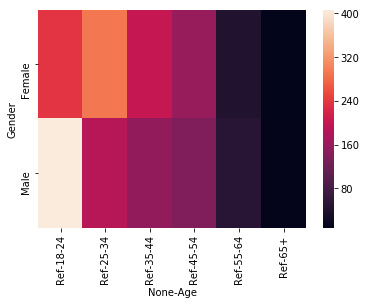

In [22]:
sns.heatmap(tab)

In [23]:
EducationMeaning = {
    -2.43591: "Left school before 16",
    -1.73790: "Left school at 16",
    -1.43719: "Left school at 17",
    -1.22751: "Left school at 18",
    -0.6111300000000001 : "Some college or university, no certificate or degree",
    -0.059210000000000006: "Professional certificate/diploma",
    0.45468000000000003 : "University degree", 
    1.16365 : "Masters degree",
    1.98437 : "Doctorate degree"
}
EducationMeaning

{-2.43591: 'Left school before 16',
 -1.7379: 'Left school at 16',
 -1.43719: 'Left school at 17',
 -1.22751: 'Left school at 18',
 -0.6111300000000001: 'Some college or university, no certificate or degree',
 -0.059210000000000006: 'Professional certificate/diploma',
 0.45468000000000003: 'University degree',
 1.16365: 'Masters degree',
 1.98437: 'Doctorate degree'}

In [24]:
drugs["Education"] = drugs.Education.map(EducationMeaning)
drugs["Education"] = drugs["Education"].astype('category');

In [25]:
ClassValue = {
    "CL0" : "Never Used",
    "CL1" : "Used over a Decade Ago",
    "CL2" : "Used in Last Decade",
    "CL3" : "Used in Last Year",
    "CL4" : "Used in Last Month",
    "CL5" : "Used in Last Week",
    "CL6" : "Used in Last Day",
    
}
ClassValue

{'CL0': 'Never Used',
 'CL1': 'Used over a Decade Ago',
 'CL2': 'Used in Last Decade',
 'CL3': 'Used in Last Year',
 'CL4': 'Used in Last Month',
 'CL5': 'Used in Last Week',
 'CL6': 'Used in Last Day'}

In [26]:
drugs["Alcohol"] = drugs.Alcohol.map(ClassValue);
drugs["Alcohol"] = drugs["Alcohol"].astype('category');
drugs["Amphet"] = drugs.Amphet.map(ClassValue);
drugs["Amphet"] = drugs["Amphet"].astype('category');
drugs["Amyl"] = drugs.Amyl.map(ClassValue);
drugs["Amyl"] = drugs["Amyl"].astype('category');
drugs["Benzos"] = drugs.Benzos.map(ClassValue);
drugs["Benzos"] = drugs["Benzos"].astype('category');
drugs["Caff"] = drugs.Caff.map(ClassValue);
drugs["Caff"] = drugs["Caff"].astype('category');
drugs["Cannabis"] = drugs.Cannabis.map(ClassValue);
drugs["Cannabis"] = drugs["Cannabis"].astype('category');
drugs["Choc"] = drugs.Choc.map(ClassValue);
drugs["Choc"] = drugs["Choc"].astype('category');
drugs["Coke"] = drugs.Coke.map(ClassValue);
drugs["Coke"] = drugs["Coke"].astype('category');
drugs["Crack"] = drugs.Crack.map(ClassValue);
drugs["Crack"] = drugs["Crack"].astype('category');
drugs["Ecstasy"] = drugs.Ecstasy.map(ClassValue);
drugs["Ecstasy"] = drugs["Ecstasy"].astype('category');
drugs["Heroin"] = drugs.Heroin.map(ClassValue);
drugs["Heroin"] = drugs["Heroin"].astype('category');
drugs["Ketamine"] = drugs.Ketamine.map(ClassValue);
drugs["Ketamine"] = drugs["Ketamine"].astype('category');
drugs["Legalh"] = drugs.Legalh.map(ClassValue);
drugs["Legalh"] = drugs["Legalh"].astype('category');
drugs["LSD"] = drugs.LSD.map(ClassValue);
drugs["LSD"] = drugs["LSD"].astype('category');
drugs["Meth"] = drugs.Meth.map(ClassValue);
drugs["Meth"] = drugs["Meth"].astype('category');
drugs["Mushrooms"] = drugs.Mushrooms.map(ClassValue);
drugs["Mushrooms"] = drugs["Mushrooms"].astype('category');
drugs["Nicotine"] = drugs.Nicotine.map(ClassValue);
drugs["Nicotine"] = drugs["Nicotine"].astype('category');
drugs["Semeron"] = drugs.Semeron.map(ClassValue);
drugs["Semeron"] = drugs["Semeron"].astype('category');
drugs["VSA"] = drugs.VSA.map(ClassValue);
drugs["VSA"] = drugs["VSA"].astype('category');

In [27]:
drugs.head()

,Ref,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,1,35-44,Female,Professional certificate/diploma,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,2,25-34,Male,Doctorate degree,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,3,35-44,Male,Professional certificate/diploma,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,4,18-24,Female,Masters degree,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,5,35-44,Female,Doctorate degree,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


In [28]:
res = drugs.groupby(["Mushrooms", "Gender"])["Ref"].count()
res

Mushrooms               Gender
Never Used              Female    608
                        Male      374
Used in Last Day        Female      2
                        Male        2
Used in Last Decade     Female    111
                        Male      149
Used in Last Month      Female     27
                        Male       88
Used in Last Week       Female     12
                        Male       28
Used in Last Year       Female     79
                        Male      196
Used over a Decade Ago  Female    103
                        Male      106
Name: Ref, dtype: int64

In [29]:
tab = pd.pivot_table(drugs,
                     index=["Gender"],
                     values=["Ref"],
                     columns=["Mushrooms"],
                     aggfunc="count")
tab

Ref                                                          \
Mushrooms Never Used Used in Last Day Used in Last Decade Used in Last Month   
Gender                                                                         
Female           608                2                 111                 27   
Male             374                2                 149                 88   

                                                                      
Mushrooms Used in Last Week Used in Last Year Used over a Decade Ago  
Gender                                                                
Female                   12                79                    103  
Male                     28               196                    106

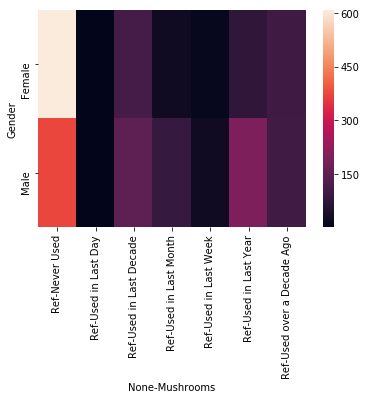

In [30]:
sns.heatmap(tab)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027527510550>,
      dtype=object)

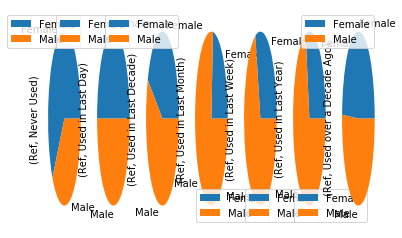

In [31]:
tab.plot.pie(subplots=True)

In [32]:
tab

Ref                                                          \
Mushrooms Never Used Used in Last Day Used in Last Decade Used in Last Month   
Gender                                                                         
Female           608                2                 111                 27   
Male             374                2                 149                 88   

                                                                      
Mushrooms Used in Last Week Used in Last Year Used over a Decade Ago  
Gender                                                                
Female                   12                79                    103  
Male                     28               196                    106

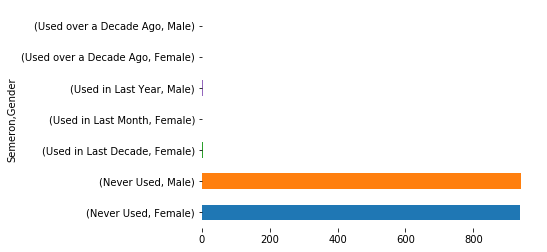

In [33]:
title = ""
to_plot = drugs.groupby(["Semeron", "Gender"])["Ref"].count()
#barh : 
ax = to_plot.plot.barh(title=title)
despine_ax(ax)

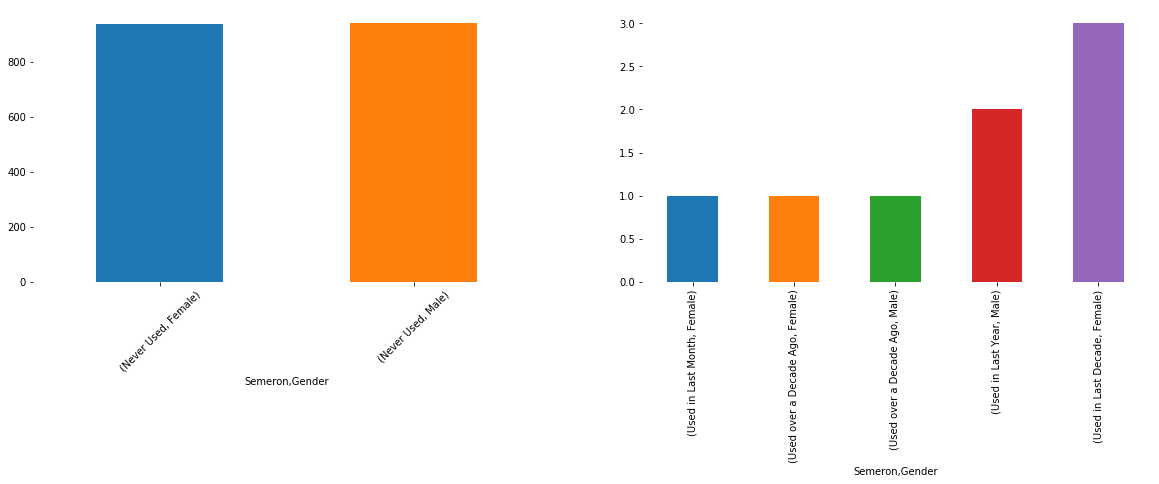

In [34]:
plt.figure(1, figsize=(20,5))

ax    = plt.subplot(121)
title = ""
to_plot.sort_values()[5:].plot.bar(title=title, rot=45, ax=ax)
despine_ax(ax)

ax    = plt.subplot(122)
title = ""
to_plot.sort_values()[:5].plot.bar(title=title, rot=90, ax=ax)
despine_ax(ax)

In [35]:
drugs.groupby(["Meth", "Gender"])["Ref"].count()

Meth                    Gender
Never Used              Female    789
                        Male      640
Used in Last Day        Female     20
                        Male       53
Used in Last Decade     Female     39
                        Male       58
Used in Last Month      Female     19
                        Male       31
Used in Last Week       Female     17
                        Male       31
Used in Last Year       Female     40
                        Male      109
Used over a Decade Ago  Female     18
                        Male       21
Name: Ref, dtype: int64

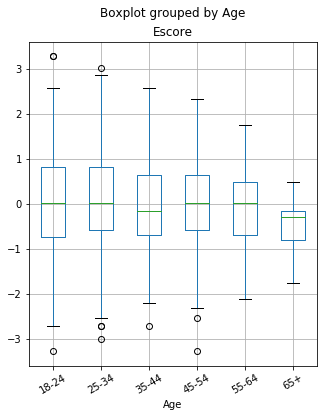

In [36]:
drugs.boxplot('Escore','Age',rot = 30,figsize=(5,6))

In [37]:
methCount = drugs['Meth'].value_counts()
methCount

Never Used                1429
Used in Last Year          149
Used in Last Decade         97
Used in Last Day            73
Used in Last Month          50
Used in Last Week           48
Used over a Decade Ago      39
Name: Meth, dtype: int64

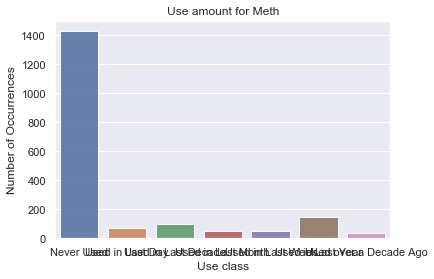

In [38]:
sns.set(style="darkgrid")
mathCount = methCount.sort_index()
sns.barplot(methCount.index, methCount.values, alpha=0.9)
plt.title('Use amount for Meth')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Use class', fontsize=12)
plt.show()

In [39]:
onlyCat_drugs = drugs.select_dtypes(include=['category']).copy()

In [40]:
onlyCat_drugs.head()

,Age,Gender,Education,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semeron,VSA
0,35-44,Female,Professional certificate/diploma,Used in Last Week,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Day,Never Used,Used in Last Week,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
1,25-34,Male,Doctorate degree,Used in Last Week,Used in Last Decade,Used in Last Decade,Never Used,Used in Last Day,Used in Last Month,Used in Last Day,...,Used in Last Month,Never Used,Used in Last Decade,Never Used,Used in Last Decade,Used in Last Year,Never Used,Used in Last Month,Never Used,Never Used
2,35-44,Male,Professional certificate/diploma,Used in Last Day,Never Used,Never Used,Never Used,Used in Last Day,Used in Last Year,Used in Last Month,...,Never Used,Never Used,Never Used,Never Used,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Never Used
3,18-24,Female,Masters degree,Used in Last Month,Never Used,Never Used,Used in Last Year,Used in Last Week,Used in Last Decade,Used in Last Month,...,Never Used,Never Used,Used in Last Decade,Never Used,Never Used,Never Used,Never Used,Used in Last Decade,Never Used,Never Used
4,35-44,Female,Doctorate degree,Used in Last Month,Used over a Decade Ago,Used over a Decade Ago,Never Used,Used in Last Day,Used in Last Year,Used in Last Day,...,Used over a Decade Ago,Never Used,Never Used,Used over a Decade Ago,Never Used,Never Used,Used in Last Decade,Used in Last Decade,Never Used,Never Used


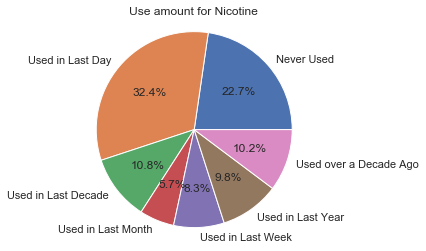

In [41]:
labels = onlyCat_drugs['Nicotine'].astype('category').cat.categories.tolist()
counts = onlyCat_drugs['Nicotine'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False) #autopct is show the % on plot
ax1.axis('equal')
plt.title('Use amount for Nicotine')
plt.show()

In [42]:
AlcoholUseSS = drugs.groupby(["Alcohol", "SS"])["Ref"].count()
AlcoholUseSS["Never Used"]

SS
-2.07848    1
-1.54858    7
-1.18084    5
-0.84637    3
-0.52593    5
-0.21575    4
 0.07987    4
 0.40148    1
 0.76540    2
 1.22470    1
 1.92173    1
Name: Ref, dtype: int64

### Chance of using Ketamine

In [43]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

## 2) Prepare the dataset for the learning

In [47]:
ketamineUseSerie = drugs.copy()
ketamineUseSerie = ketamineUseSerie.drop(columns=['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 
                       'Ecstasy',  'Heroin', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semeron', 'VSA'])
ketamineUseSerie["User"] = ketamineUseSerie.Ketamine.apply(IsUser)
ketamineUseSerie = ketamineUseSerie.drop(columns=['Education', 'Gender','Age','Ketamine', 'Ref', 'Country', 'Ethnicity', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore','Impulsive'])
ketamineUseSerie.sample(5)


,SS,User
1600,1.22470,0
1018,-0.52593,0
1006,0.40148,5
116,-0.21575,0
1755,0.40148,0


## 3) Create the training and test datasets

In [48]:

y = ketamineUseSerie["User"]
ketamineUseSerie.drop(columns=["User"])
X_train, X_test, y_train, y_test = train_test_split(ketamineUseSerie, y, test_size=0.2)

## 4) Standardise the data values

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)                 # Il ne faut fiter que sur les data d'entrainement
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)  # apply same transformation to test data

In [44]:
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(1508, 2) (1508,)
(377, 2) (377,)


## 5) Choose an algorithm and test it

In [46]:
from sklearn import svm
svr = svm.SVR(kernel='linear')

from sklearn import cross_validation
cross_validation.cross_val_score(svr, ketamineUseSerie, y, n_jobs=-1)

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([0.98658933, 0.99664667, 0.99408644])

## 6) Optimising the hyperparameters with Grid search

In [47]:
from sklearn import cross_validation
from sklearn import grid_search

parameters = {  'gamma' : [0.01, 0.1, 0.5] }
grid       = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

D:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.9972002180710375 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


## 7) Refine the grid search

In [48]:
parameters = {  'C'      : [0.5, 1, 1.5]             ,
                'gamma'  : [0.5, 0.1, 0.15]      }
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)

0.9948705793705177 SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.15,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [49]:
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_, grid.best_estimator_)


0.9967726343707184 SVR(C=1.5, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.05,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [50]:
parameters = {  'C'       : [2.5, 3, 4]   ,
                'kernel'  : ['rbf', 'poly', 'sigmoid'],
                'gamma'   : [ 0.01, 0.05, 0.07],
                 "degree" : [1,3,5]}
grid = grid_search.GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(X_train, y_train)
print (grid.best_score_, grid.best_estimator_)

0.9985607002742415 SVR(C=4, cache_size=200, coef0=0.0, degree=1, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


## 7) Linear regression

In [49]:
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

Text(0,0.5,'Predictions')

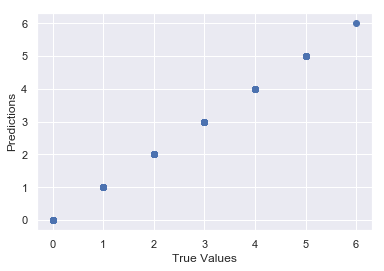

In [50]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [51]:
print ("Score:", model.score(X_test, y_test))

Score: 1.0


In [52]:
lm.predict(X_test)

array([-8.83468688e-16,  2.00000000e+00, -2.50577317e-16, -2.50577317e-16,
       -1.74104944e-16, -1.74104944e-16, -1.74104944e-16, -9.00258019e-17,
       -6.19088327e-16, -8.83468688e-16,  1.00000000e+00, -5.35882580e-16,
        2.00000000e+00, -9.00258019e-17, -2.50577317e-16, -7.24101515e-16,
       -1.74104944e-16, -5.35882580e-16, -5.35882580e-16, -2.50577317e-16,
       -4.62350484e-16, -6.19088327e-16,  3.11291917e-17,  2.00000000e+00,
       -7.24101515e-16, -3.23841907e-16, -6.19088327e-16,  2.00000000e+00,
       -2.50577317e-16, -3.23841907e-16, -5.35882580e-16, -1.74104944e-16,
       -2.50577317e-16, -1.74104944e-16, -1.74104944e-16, -3.94760676e-16,
        5.00000000e+00, -5.35882580e-16, -6.19088327e-16, -3.94760676e-16,
       -6.19088327e-16,  3.00000000e+00,  3.00000000e+00, -2.50577317e-16,
       -5.35882580e-16, -3.23841907e-16, -5.35882580e-16,  2.00000000e+00,
       -3.94760676e-16, -7.24101515e-16, -8.83468688e-16,  1.00000000e+00,
        3.11291917e-17, -

In [53]:
sortedDrugs = drugs.sort_values("SS")

In [54]:
import matplotlib.ticker as ticker
sortedDrugs = pd.concat([sortedDrugs.Ref, sortedDrugs.SS, sortedDrugs.Gender], axis=1)
tab = sortedDrugs.pivot_table(index=["Gender"], 
                         columns=["SS"],
                         values=["SS"],
                         aggfunc="count",
                         fill_value=0)
tab

Ref                                                        \
SS     -2.07848 -1.54858 -1.18084 -0.84637 -0.52593 -0.21575  0.07987   
Gender                                                                  
Female       59       62       83      108      127      119       96   
Male         12       25       49       61       84      104      123   

                                            
SS      0.40148  0.76540  1.22470  1.92173  
Gender                                      
Female      102       67       76       43  
Male        147      144      134       60

## Sensation seeker level in function of usage level

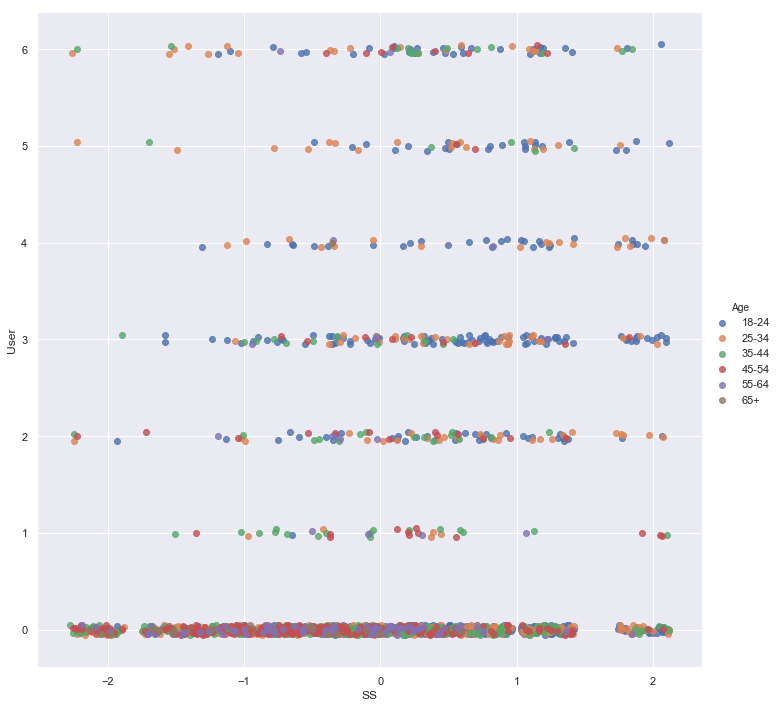

In [55]:
scatterPlot = pd.concat([drugs.Age, drugs.Gender, drugs.SS, drugs.Meth], axis=1)
scatterPlot["User"] = scatterPlot.Meth.apply(IsUser)
scatterPlot["User"] = scatterPlot["User"].astype("int64")

sns.lmplot( x="SS", y="User", data=scatterPlot, fit_reg=False, hue='Age', legend=True, x_jitter=0.2, y_jitter=0.05, height=10)

We can see that the most Meth users fall into the high SS ratings. This is in no way conclusive because the spread is quite uniform over the usage amount
We can also see that most of the non users are either old or really young

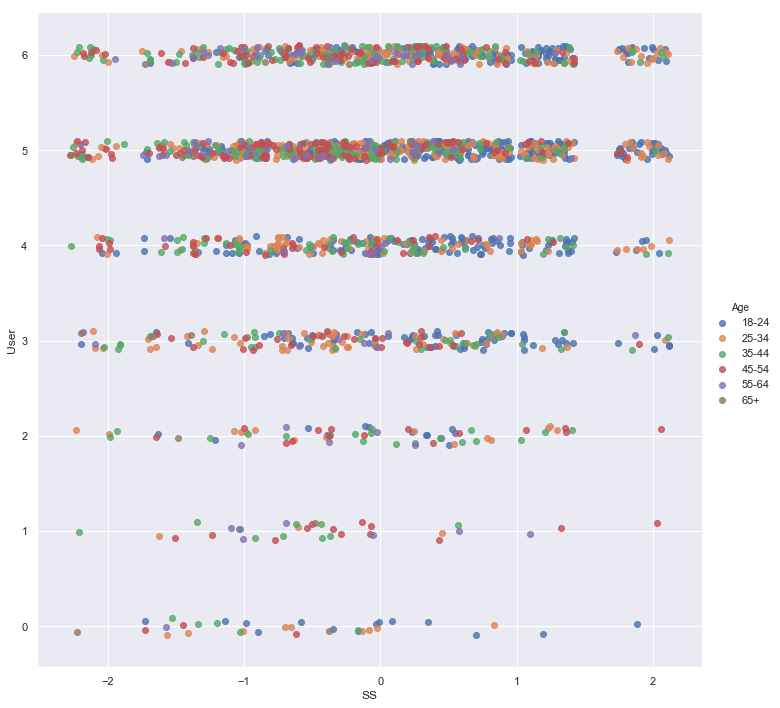

In [56]:
scatterPlot = pd.concat([drugs.Age, drugs.Gender, drugs.SS, drugs.Alcohol], axis=1)
scatterPlot["User"] = scatterPlot.Alcohol.apply(IsUser)
scatterPlot["User"] = scatterPlot["User"].astype("int64")

sns.lmplot( x="SS", y="User", data=scatterPlot, fit_reg=False, hue='Age', legend=True, x_jitter=0.2, y_jitter=0.1, height=10)

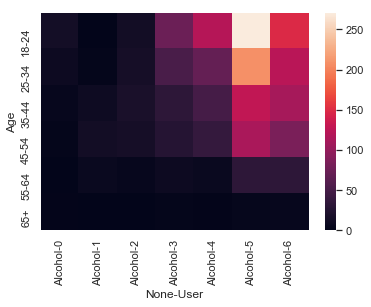

In [57]:
tab = scatterPlot.pivot_table(index=["Age"], 
                         columns=["User"],
                         values=["Alcohol"],
                         aggfunc="count",
                         fill_value=0)
sns.heatmap(tab)

From these 2 graphs, we can see that the number of alcohol users are very high for people having drank in the last decade, which is worrying as they are all 24 and under and they would be like 10 when they drank the alcohol...


## Is a user of one type of drug more likely to use another

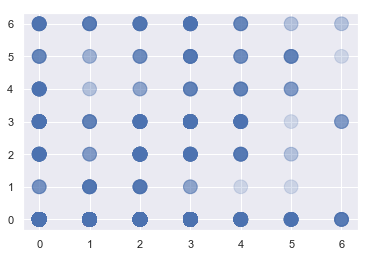

In [58]:
scatterPlot = pd.concat([drugs.Meth, drugs.Coke, drugs.Crack, drugs.Gender], axis=1)
scatterPlot["CokeUser"] = scatterPlot.Coke.apply(IsUser)
scatterPlot["MethUser"] = scatterPlot.Meth.apply(IsUser)
scatterPlot["CrackUser"] = scatterPlot.Crack.apply(IsUser)
scatterPlot["CokeUser"] = scatterPlot["CokeUser"].astype("int64")
scatterPlot["MethUser"] = scatterPlot["MethUser"].astype("int64")
scatterPlot["CrackUser"] = scatterPlot["CrackUser"].astype("int64")

plt.scatter(scatterPlot.CokeUser, scatterPlot.MethUser, alpha=0.2, s=scatterPlot.count()/10)

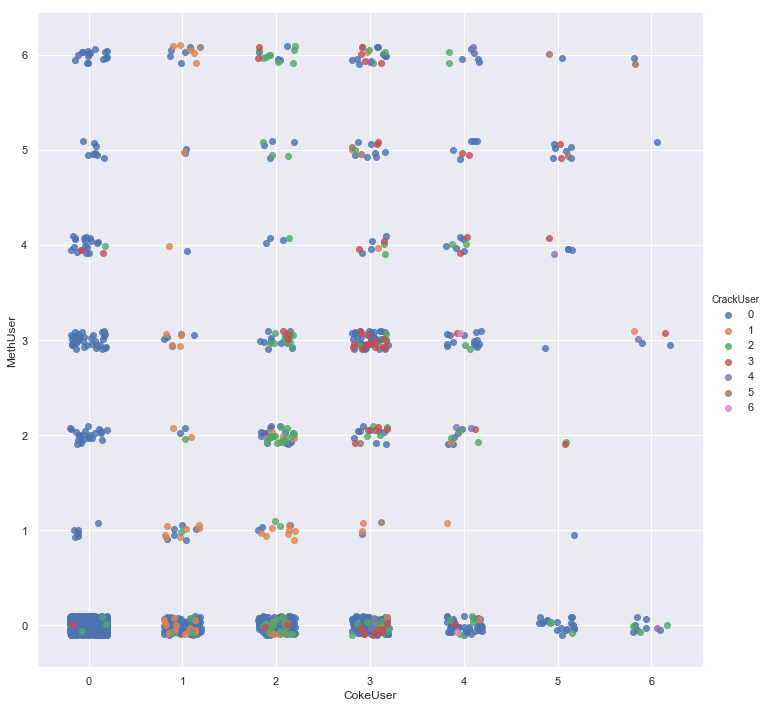

In [59]:
sns.lmplot( x="CokeUser", y="MethUser", data=scatterPlot, fit_reg=False, hue='CrackUser', legend=True, x_jitter=0.2, y_jitter=0.1, height=10)

Interestingly enough, we can see that if you have used one of these drugs in the last year, a bunch of people tried the others too as we can see in the center

## Let us take a look at the education and how it affects drug use

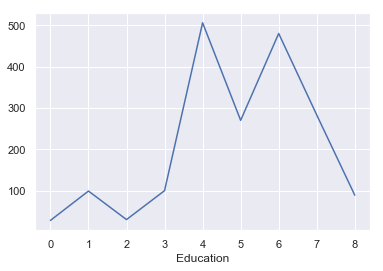

In [87]:
educationFrame = pd.concat([drugs.Education.apply(SetEducationToInt), 
                            drugs.Gender.apply(SetGenderToInt), 
                            drugs.Coke.apply(IsUser),
                            drugs.Cannabis.apply(IsUser).sort_index()
                            ], axis=1)
educationFrame["Education"] = educationFrame["Education"].astype("int64")
educationFrame["Gender"] = educationFrame["Gender"].astype("int64")
educationFrame["Coke"] = educationFrame["Coke"].astype("int64")
educationFrame["Cannabis"] = educationFrame["Cannabis"].astype("int64")

eduCount = educationFrame.groupby('Education')['Gender'].apply(lambda x: x.count())
eduCount = eduCount.sort_index()
eduCount.plot()

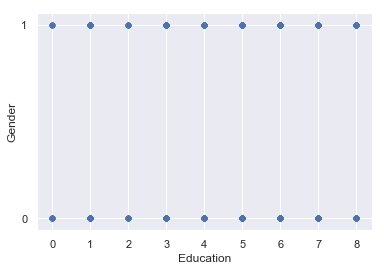

In [88]:
educationFrame.plot(kind="scatter", x="Education", y="Gender", yticks=[0, 1])

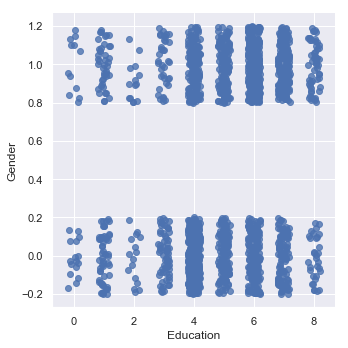

In [89]:
sns.lmplot( x="Education", y="Gender", data=educationFrame, fit_reg=False, legend=True, x_jitter=0.2, y_jitter=0.2, height=5)

We can see that for the most part, we have people a lot of people who have gone to university but dropped out and a lot of people with a university degree

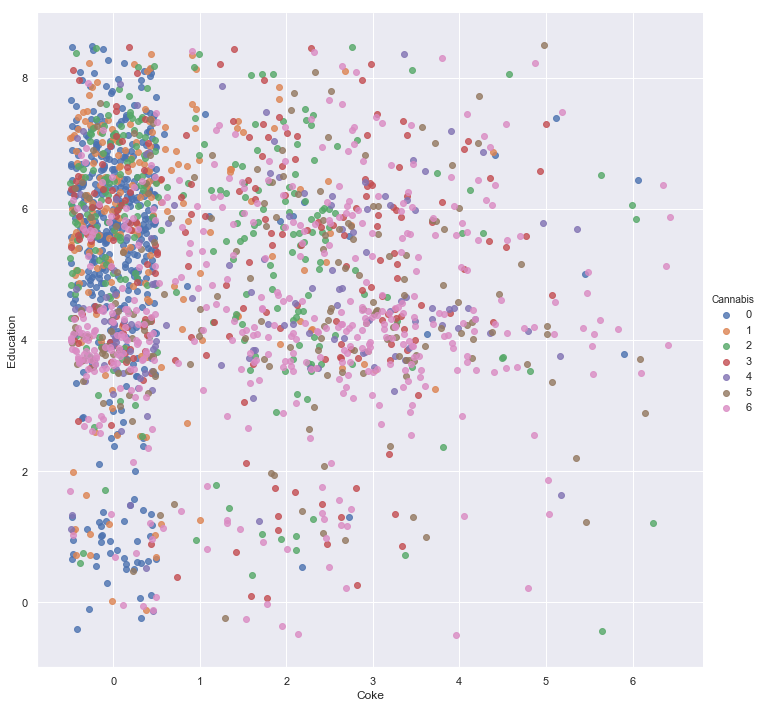

In [99]:
sns.lmplot( y="Education", x="Coke", data=educationFrame, fit_reg=False, hue="Cannabis", legend=True, x_jitter=0.5, y_jitter=0.5, height=10)

We can see that the heaviest users of cannabis is in the higher education level. We could hypotisize that the higher stress from work or studies could push people to smoke more cannabis.

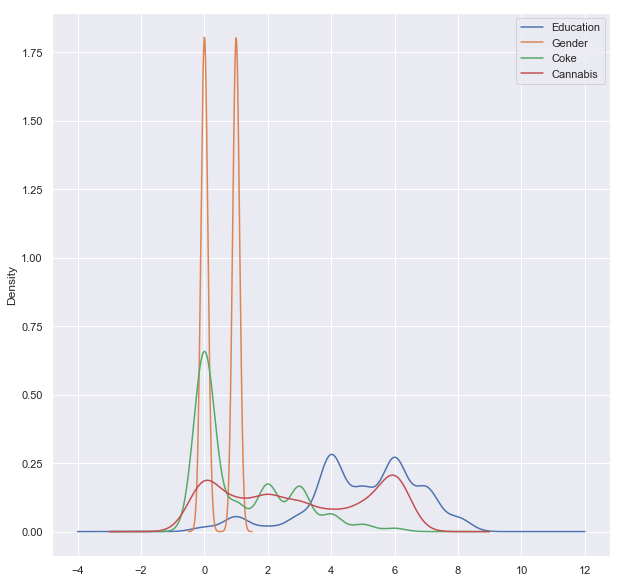

In [112]:
educationFrame.plot(kind="kde",figsize=(10,10))